# Available XC functionals

A number of exchange–correlation (XC) functionals are available in VeloxChem.

We will calculate the electronic energy of helium using the Hartree–Fock and second-order Møller–Plesset methods as well as Kohn–Sham density functional theory using the available XC functionals.

In [1]:
import matplotlib.pyplot as plt
import veloxchem as vlx

In [2]:
molecule = vlx.Molecule.read_str("He   0.000  0.000  0.000")
basis = vlx.MolecularBasis.read(molecule, "cc-pvtz")

* Info * Reading basis set from file: /home/xinli/miniconda3/envs/echem/lib/python3.10/site-packages/veloxchem/basis/CC-PVTZ
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVTZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
              

## Hartree–Fock

In [3]:
scf_drv = vlx.ScfRestrictedDriver()
scf_results = scf_drv.compute(molecule, basis)

scf_energies = {}
scf_energies["HF"] = scf_drv.get_scf_energy()

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

## MP2

In [4]:
mp2_drv = vlx.Mp2Driver()
mp2_results = mp2_drv.compute(molecule, basis, scf_drv.mol_orbs)

scf_energies["MP2"] = mp2_results["mp2_energy"] + scf_energies["HF"]

                                                                                                                          
                                                     MP2 Driver Setup                                                     
                                                                                                                          
                               Number of Fock Matrices      : 1                                                           
                               Size of Fock Matrices Batch  : 100                                                         
                               Number of Subcommunicators   : 1                                                           
                               ERI Screening Scheme         : Cauchy Schwarz + Density                                    
                               ERI Screening Threshold      : 1.0e-12                                                     
                

## DFT

In [5]:
for xcfun in vlx.available_functionals():
    scf_drv.xcfun = xcfun
    scf_drv.ostream.mute()
    scf_drv.compute(molecule, basis)
    scf_energies[xcfun] = scf_drv.get_scf_energy()

for method in scf_energies:
    if method not in ["HF", "MP2"]:
        print(f'    {method:<12s}: {scf_energies[method]:16.8f} a.u.')

    SLATER      :      -2.72271178 a.u.
    SLDA        :      -2.87143717 a.u.
    B88X        :      -2.86247050 a.u.
    BLYP        :      -2.90621759 a.u.
    B3LYP       :      -2.91450655 a.u.
    BHANDH      :      -2.83473781 a.u.
    BHANDHLYP   :      -2.90514866 a.u.
    PBE         :      -2.89213590 a.u.
    PBE0        :      -2.89451563 a.u.
    REVPBE      :      -2.90710482 a.u.
    BP86        :      -2.90557480 a.u.
    PW91        :      -2.89919908 a.u.
    MPW1K       :      -2.90521521 a.u.
    OLYP        :      -2.90644600 a.u.
    O3LYP       :      -2.90951647 a.u.
    X3LYP       :      -2.90759000 a.u.
    B97         :      -2.90931588 a.u.
    B97-1       :      -2.90639481 a.u.
    B97-2       :      -2.90940855 a.u.
    B97-3       :      -2.91133188 a.u.
    TPSS        :      -2.90886838 a.u.
    TPSSH       :      -2.90836089 a.u.
    REVTPSS     :      -2.91132827 a.u.
    PKZB        :      -2.90387499 a.u.
    SCAN        :      -2.90431544 a.u.


## Plotting the energies

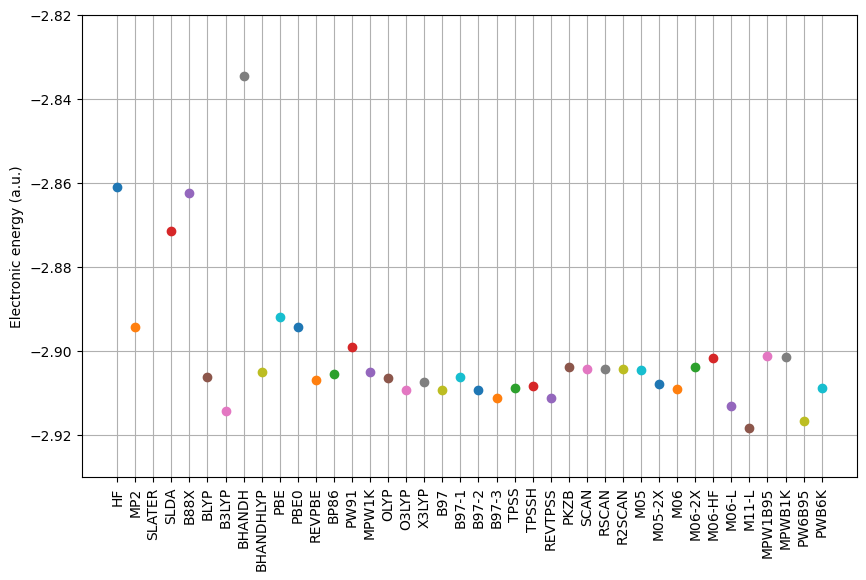

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, method in enumerate(scf_energies.keys()):
    ax.plot(i, scf_energies[method], "o")

ax.set_xticks(range(len(scf_energies)), scf_energies.keys())
plt.xticks(rotation=90)

ax.set_ylim(-2.93, -2.82)
plt.ylabel("Electronic energy (a.u.)")

plt.grid(True)
plt.show()